# Autocorrelation and Partial Autocorrelation

ACF and PACF plots allow you to decide what AR, MA or ARIMA model to use, as well as the best order for the model (`p` & `q`). Using synthetic data, look at different orders in ACF and PACF plots to see how to interpret the autocorrelation and partial autocorrelation.

* Both ACF and PACF plots can be used for determining the ARIMA model parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

## Partial Autocorrelation (PACF)

**PACF plots are used for AutoRegressive models, which base forecast on previous lagged values. You can determine the order of the AR model by finding the highest lag number in PACF plot that is outside of the confidence interval.**

**NOTE: The order of AR model is specified in the `p` parameter.**

In [3]:
# Generate data from normal distribution

x0 = np.random.randn(1000)

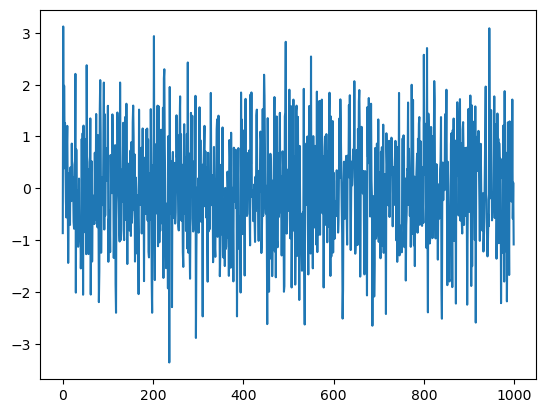

In [4]:
plt.plot(x0);

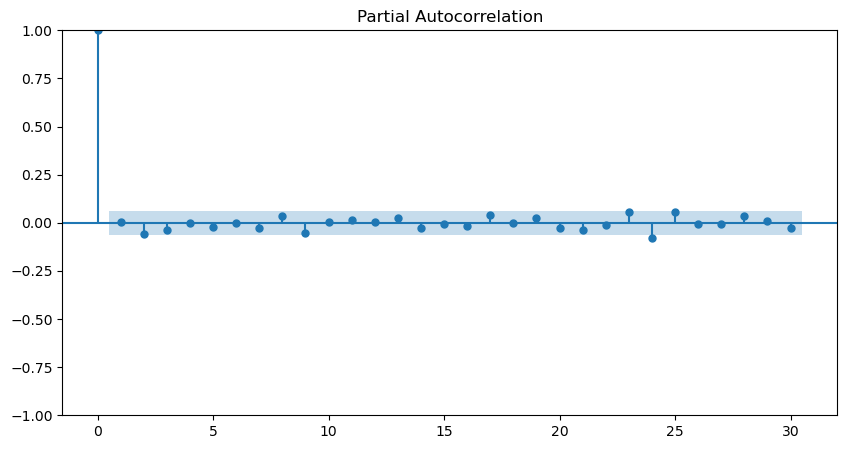

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x0, method='ywm', ax=ax);

**All the correlated points lie in or on the egde of the confidence interval, so it is safe to ignore them all.**

In [7]:
# Create new data by multiplying previous value by 0.5, plus some noise and std dev 0.1

# Initial value of 0
x1 = [0]

for i in range(1000):
    x = 0.5 * x1[-1] + 0.1 * np.random.randn() 
    x1.append(x)
    
x1 = np.array(x1)

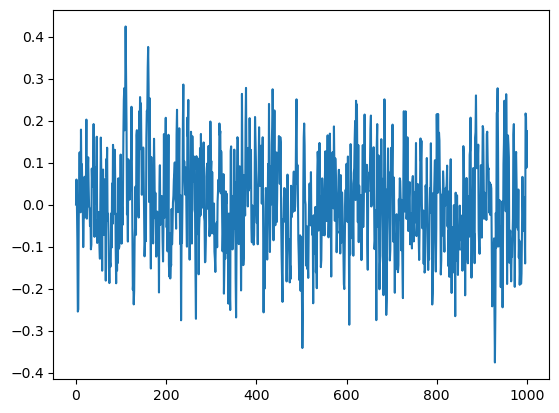

In [8]:
plt.plot(x1);

**Data looks pretty stationary - not much difference between this one and before, as in it is not obvious that the current value depends on the previous value.**

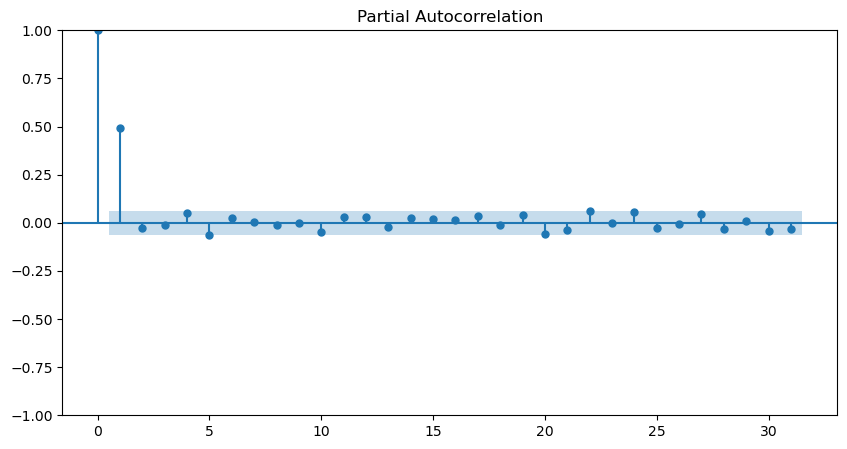

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax);

**Aha! Now we can see that at lag of one, the correlation is far outside of the confidence threshold, and there are no other non-zero correlations. This shows that an AR model of order one, `AR(1)`, is suitable for this data. Since you intentionally created the data based on previous value, we know this to be correct.**

In [10]:
# Create new data by multiplying previous value by -0.5, plus some noise and std dev 0.1

x2 = [0]

for i in range(1000):
    x = -0.5 * x2[-1] + 0.1 * np.random.randn()
    x2.append(x)

x2 = np.array(x2)

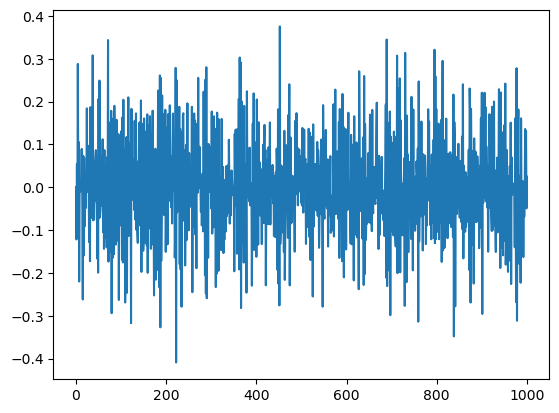

In [11]:
plt.plot(x2);

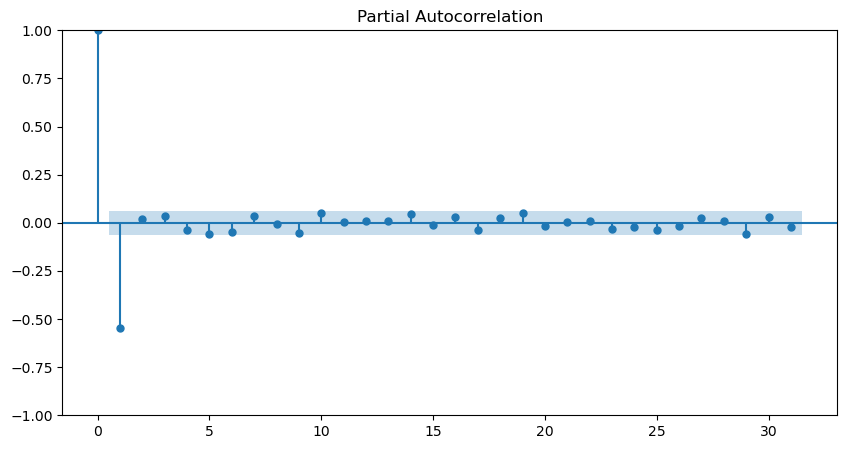

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x2, ax=ax);

**Again, at lag of one you can see correlation outside of the confidence interval. The only difference is the correlation is negative, in accordance with the negative coefficient (-0.5) when creating new dataset. The same `AR(1)` model is appropriate for this data.**

In [14]:
# Generate new data that depends on two past values, plus Gaussian noise and std dev 0.1

x3 = [0, 0]

for i in range(1000):
    x = 0.5 * x3[-1] - 0.3 * x3[-2] + 0.1 * np.random.randn()
    x3.append(x)

x3 = np.array(x3)

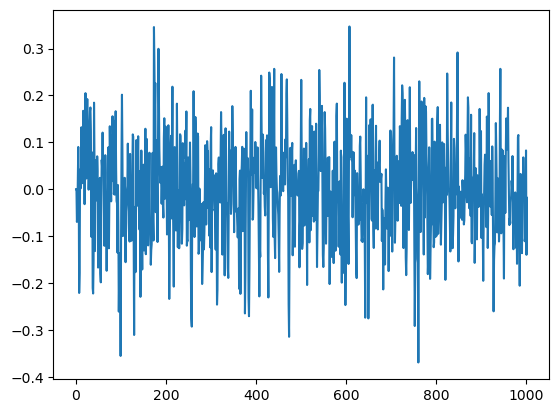

In [15]:
plt.plot(x3);

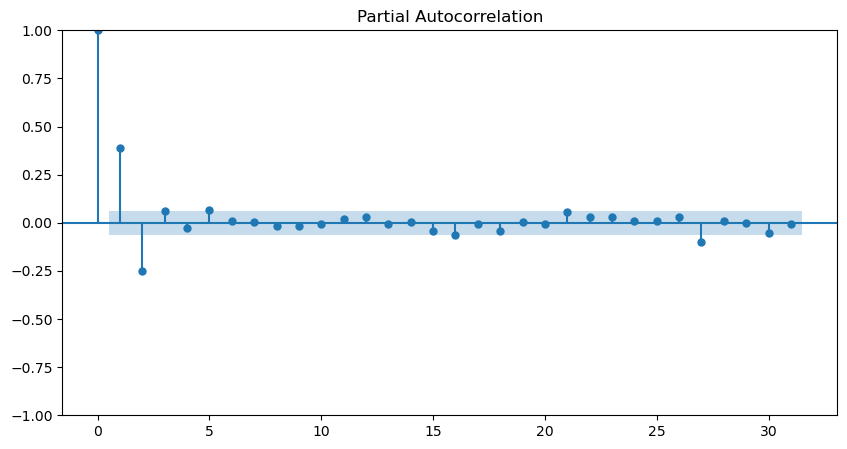

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x3, ax=ax);

**Even though the plotted data looks similar to all the others, the PACF plot shows the correlation upto two lags are outside of the threshold hence `AR(2)` model is suitable, which is what you intended when creating the dataset.**

In [17]:
# Generate new data that depends on three lagged values (1st, 2nd & 5th) multiplied by weights plus some noise and std dev 0.1

x5 = [0, 0, 0, 0, 0]

for i in range(1000):
    x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 * np.random.randn()
    x5.append(x)

x5 = np.array(x5)

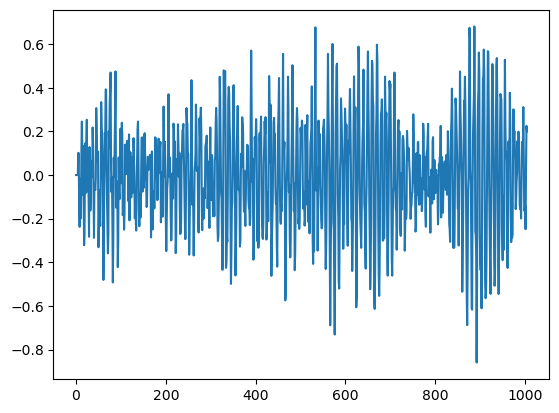

In [18]:
# Definitely looks different now - more of a wave-like pattern

plt.plot(x5);

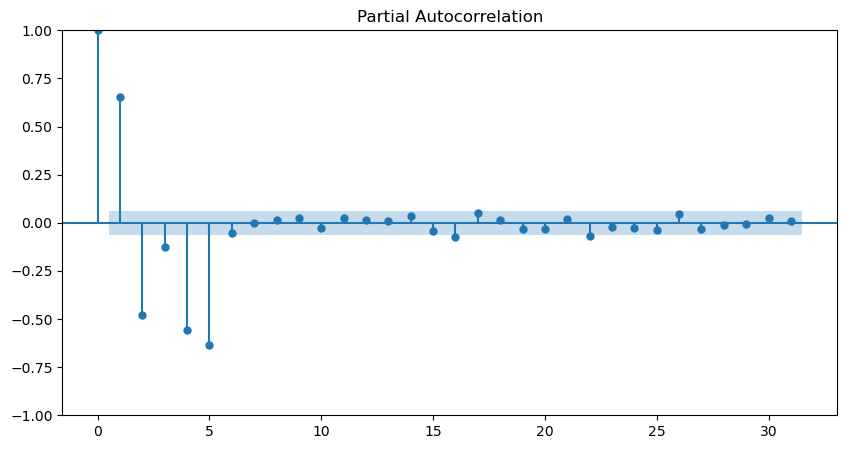

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x5, ax=ax);

**Even though the data creation did not depend on the third and fourth lagged values, all previous lagged values are outside of the confidence interval. Regardless, the highest lag number for data points correlating outside of the blue zone is 5, so an `AR(5)` model is best for this data.**

## Autocorrelation (ACF)

**ACF plots are used for Moving Average models, which base forecast on previous lagged errors. You can determine the order of the MA model by finding the highest lag number in ACF plot that has data outside of the confidence interval.**

**NOTE: The order of MA model is specified in the `q` parameter.**

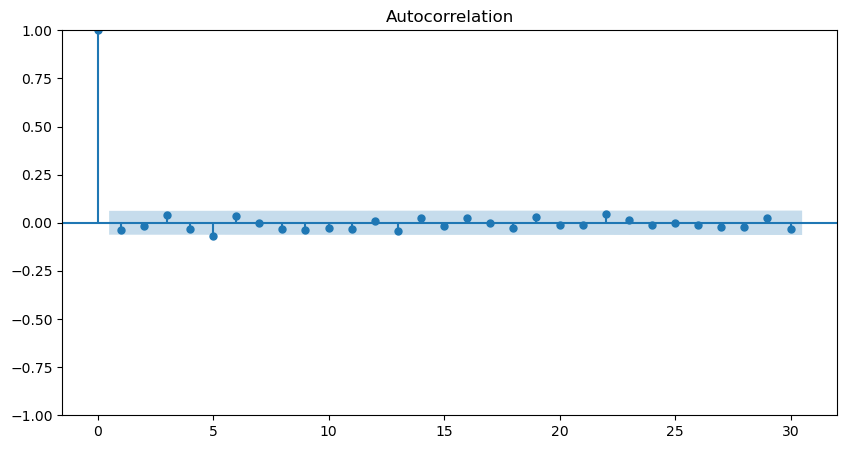

In [20]:
# Plot ACF for normal distribution

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(np.random.randn(1000), ax=ax);

**As expected, there is no correlation between any other values in a normal distribution.** 

In [21]:
# Generate data based on previous error, using an array of errors (Gaussian noise multiplied by 0.1)

errors = 0.1 * np.random.randn(1000)
MA_1 = []

for i in range(1000):
    if i >= 1:
        x = 0.5 * errors[i-1] + errors[i]
    else:
        x = errors[i]
        
    MA_1.append(x)

MA_1 = np.array(MA_1)

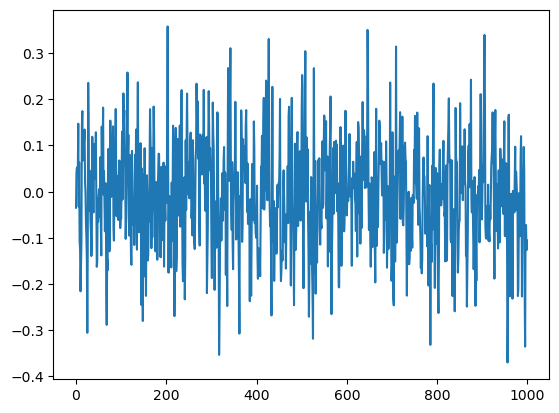

In [22]:
# Looks like regular time series

plt.plot(MA_1);

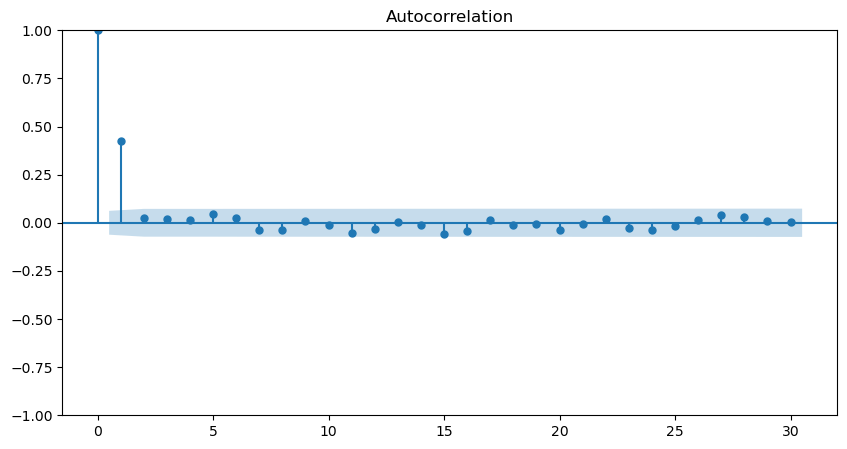

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(MA_1, ax=ax);

**Up to one lag, the correlation is outside of the confidence interval so the appropriate order of MA model is one - `MA(1)`.**

In [24]:
# Generate new data that depends on past two lagged errors

errors = 0.1 * np.random.randn(1000)
MA_2 = []

for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i] 
    MA_2.append(x)

MA_2 = np.array(MA_2)

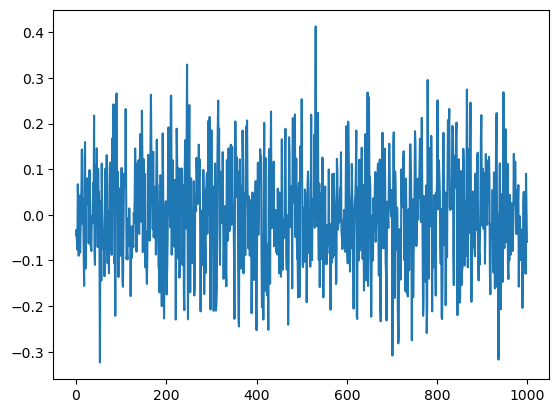

In [25]:
plt.plot(MA_2);

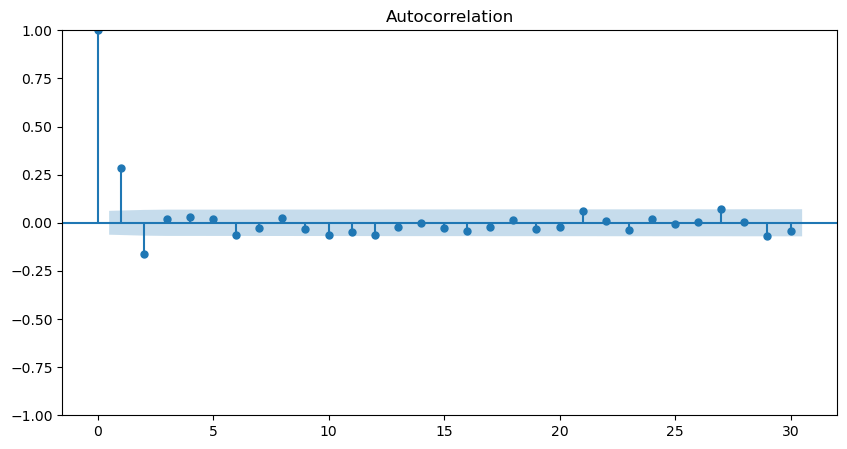

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(MA_2, ax=ax);

**As intended, the correlation is outside of the confidence interval upto two lags, so the order of the MA model is two - `MA(2)`.**

In [27]:
# Generate new data that depends on previous three lagged errors multiplied by weights

errors = 0.1 * np.random.randn(1000)
MA_3 = []

for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + errors[i]
    MA_3.append(x)

MA_3 = np.array(MA_3)

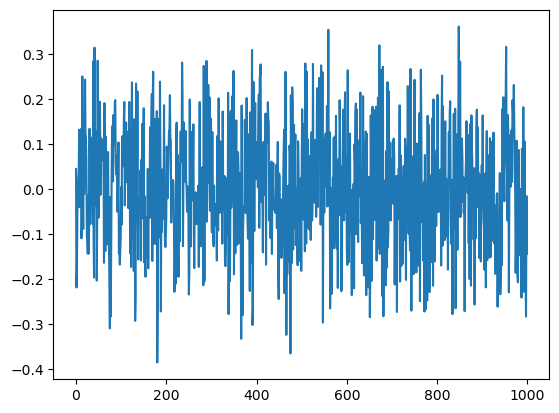

In [28]:
plt.plot(MA_3);

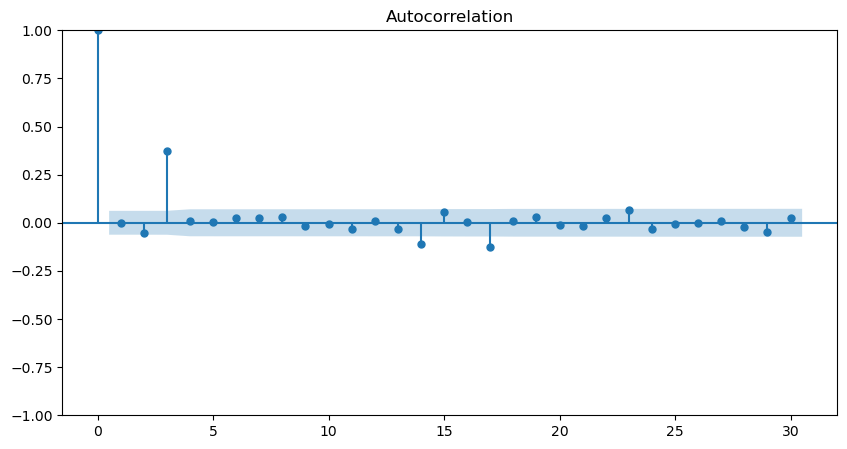

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(MA_3, ax=ax);

**The highest correlation occurs at three lags, but note that there is some correlation outside of the confidence interval at 17 lags. This is actually normal, due to random noise in data making it possible, but since the correlation is barely outside of the blue zone, you can ignore it, so the best order of MA model is three - `MA(3)`.**

In [30]:
# Generate new data that depends on six past errors multiplied by weights plus some noise

errors = 0.1 * np.random.randn(1000)
MA_6 = []

for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + 0.2 * errors[i-4] - 0.8 * errors[i-5] - 0.9 * errors[i-6] + errors[i]
    
    MA_6.append(x)

MA_6 = np.array(MA_6)

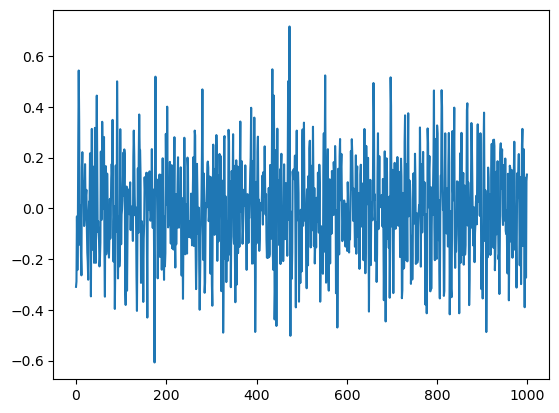

In [31]:
plt.plot(MA_6);

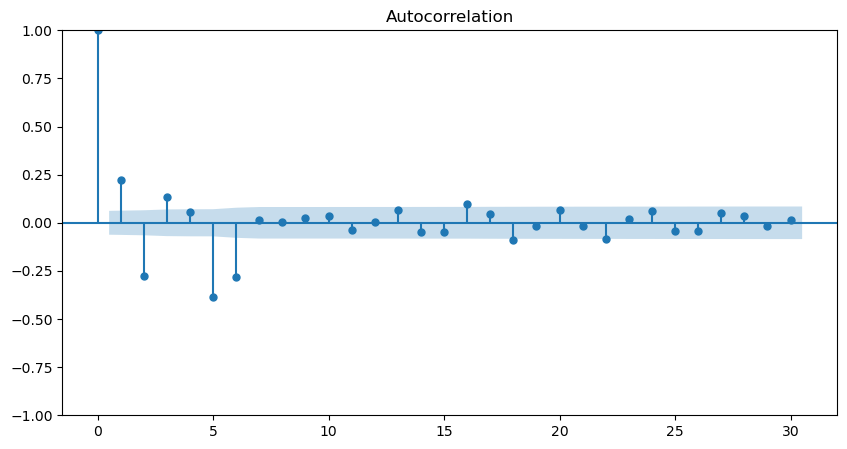

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(MA_6, ax=ax);

**The ACF plot shows several points outside of the confidence interval, where the strongest correlation occurs at 5 lags, but the correlation is significant upto 6 lags, therefore you use MA model order of 6, `MA(6)`.**